Gowtham Pulivendula

AM.EN.U4CSE19143

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
#data collection
data = pd.read_csv("district wise rainfall normal.csv")
data.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null    float64
 18  Oct-Dec   

In [4]:
# date preprocessing
data.isnull().sum()

STATE_UT_NAME    0
DISTRICT         0
JAN              0
FEB              0
MAR              0
APR              0
MAY              0
JUN              0
JUL              0
AUG              0
SEP              0
OCT              0
NOV              0
DEC              0
ANNUAL           0
Jan-Feb          0
Mar-May          0
Jun-Sep          0
Oct-Dec          0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data['STATE_UT_NAME'].value_counts()

UTTAR PRADESH                  71
MADHYA PRADESH                 50
BIHAR                          38
MAHARASHTRA                    35
RAJASTHAN                      33
TAMIL NADU                     32
ORISSA                         30
KARNATAKA                      30
ASSAM                          27
GUJARAT                        26
JHARKHAND                      24
ANDHRA PRADESH                 23
JAMMU AND KASHMIR              22
HARYANA                        21
PUNJAB                         20
WEST BENGAL                    19
CHATISGARH                     18
ARUNACHAL PRADESH              16
KERALA                         14
UTTARANCHAL                    13
HIMACHAL                       12
NAGALAND                       11
MANIPUR                         9
MIZORAM                         9
DELHI                           9
MEGHALAYA                       7
PONDICHERRY                     4
SIKKIM                          4
TRIPURA                         4
ANDAMAN And NI

In [7]:
data.mean()

JAN          18.355070
FEB          20.984399
MAR          30.034789
APR          45.543214
MAY          81.535101
JUN         196.007332
JUL         326.033697
AUG         291.152262
SEP         194.609048
OCT          90.446334
NOV          34.117473
DEC          18.150858
ANNUAL     1346.969579
Jan-Feb      39.339470
Mar-May     157.113105
Jun-Sep    1007.802340
Oct-Dec     142.714665
dtype: float64

In [8]:
data = data.fillna(data.mean())

In [9]:
data.head(3)

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7


In [10]:
data.isnull().any()

STATE_UT_NAME    False
DISTRICT         False
JAN              False
FEB              False
MAR              False
APR              False
MAY              False
JUN              False
JUL              False
AUG              False
SEP              False
OCT              False
NOV              False
DEC              False
ANNUAL           False
Jan-Feb          False
Mar-May          False
Jun-Sep          False
Oct-Dec          False
dtype: bool

In [11]:
data.DISTRICT.unique()

array(['NICOBAR', 'SOUTH ANDAMAN', 'N & M ANDAMAN', 'LOHIT', 'EAST SIANG',
       'SUBANSIRI F.D', 'TIRAP', 'ANJAW (LOHIT)', 'LOWER DIBANG',
       'CHANGLANG', 'PAPUM PARE', 'LOW SUBANSIRI', 'UPPER SIANG',
       'WEST SIANG', 'DIBANG VALLEY', 'WEST KAMENG', 'EAST KAMENG',
       'TAWANG(W KAME', 'KURUNG KUMEY', 'CACHAR', 'DARRANG', 'GOALPARA',
       'KAMRUP', 'LAKHIMPUR', 'NORTH CACHAR', 'NAGAON', 'SIVASAGAR',
       'BARPETA', 'DHUBRI', 'DIBRUGARH', 'JORHAT', 'KARIMGANJ',
       'KOKRAJHAR', 'SHONITPUR', 'GOLAGHAT', 'TINSUKIA', 'HAILAKANDI',
       'DHEMAJI(LAKHI', 'KARBI ANGLONG', 'UDALGURI(DARA', 'KAMRUP METROP',
       'CHIRANG(BONGAI', 'BAKSA BARPETA', 'BONGAIGAON', 'MORIGAON',
       'NALBARI', 'EAST KHASI HI', 'JAINTIA HILLS', 'EAST GARO HIL',
       'RI-BHOI', 'SOUTH GARO HI', 'W KHASI HILL', 'WEST GARO HIL',
       'IMPHAL EAST', 'SENAPATI', 'TAMENGLONG', 'CHANDEL', 'UKHRUL',
       'THOUBAL', 'BISHNUPUR', 'IMPHAL WEST', 'CHURACHANDPUR', 'AIZAWL',
       'CHAMPHAI', 'KOLASI

In [12]:
data.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,641.000000
mean,18.355070,20.984399,30.034789,45.543214,81.535101,196.007332,326.033697,291.152262,194.609048,90.446334,34.117473,18.150858,1346.969579,39.339470,157.113105,1007.80234,142.714665
std,21.082806,27.729596,45.451082,71.556279,111.960390,196.556284,221.364643,152.647325,99.830540,74.990685,59.371274,32.711009,838.878874,47.212773,213.445888,629.33261,148.951752
min,0.000000,0.000000,0.000000,0.000000,0.900000,3.800000,11.600000,14.100000,8.600000,3.100000,1.200000,0.000000,94.600000,0.000000,1.500000,39.60000,5.600000
25%,6.900000,7.000000,7.000000,5.000000,12.100000,68.800000,206.400000,194.600000,128.800000,34.300000,6.600000,5.300000,830.400000,14.700000,27.800000,625.40000,51.600000
50%,13.300000,12.300000,12.700000,15.100000,33.900000,131.900000,293.700000,284.800000,181.300000,62.600000,12.900000,7.900000,1116.200000,27.700000,67.200000,896.60000,86.700000
75%,19.200000,24.100000,33.200000,48.300000,91.900000,226.600000,374.800000,358.100000,234.100000,130.200000,32.300000,14.900000,1530.900000,41.100000,172.400000,1193.80000,175.200000
max,144.500000,229.600000,367.900000,554.400000,733.700000,1476.200000,1820.900000,1522.100000,826.300000,517.700000,475.100000,297.700000,7229.300000,335.300000,1256.500000,5228.00000,1048.500000


In [13]:
data.shape

(641, 19)

C:\Users\capta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ANNUAL', ylabel='Density'>

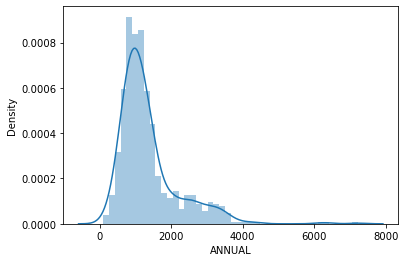

In [14]:
sns.distplot(data['ANNUAL'], hist =True)

In [15]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

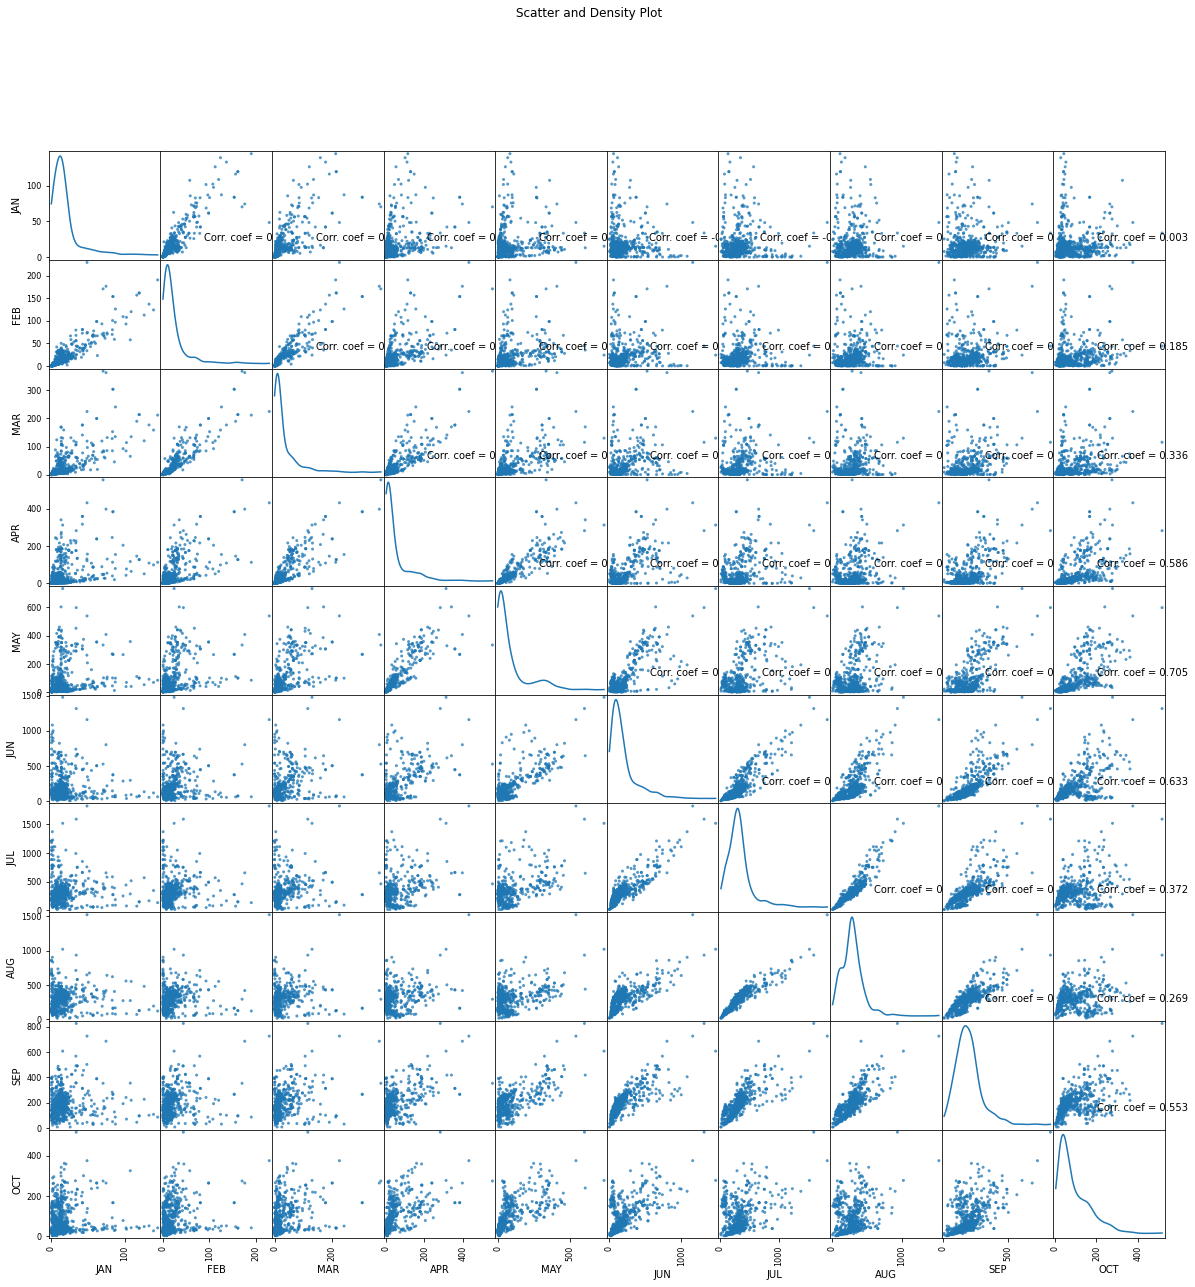

In [16]:
plotScatterMatrix(data, 20, 10)

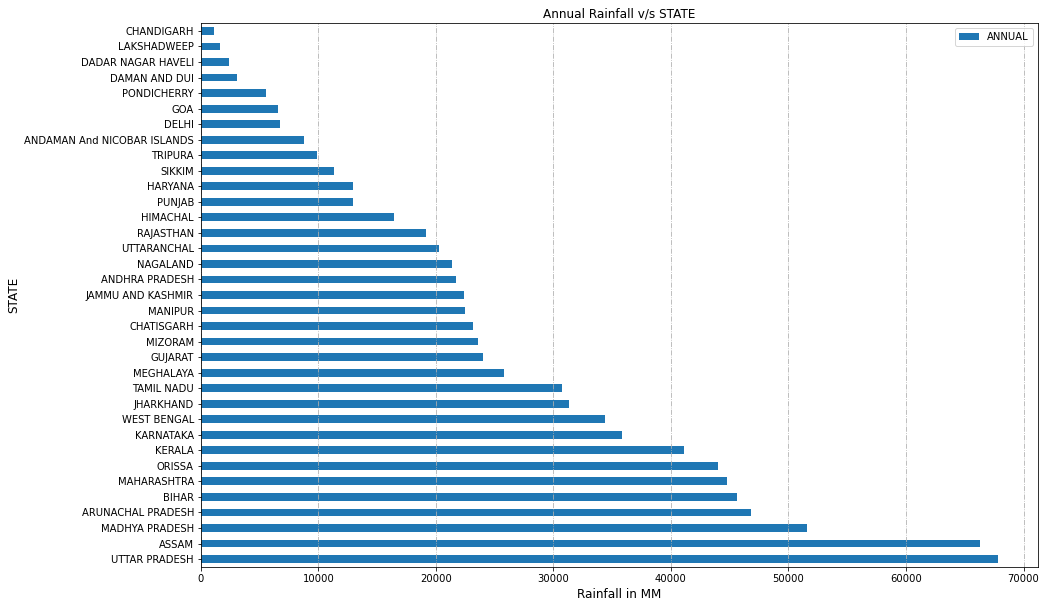

In [17]:
# data visulization
data[["STATE_UT_NAME","ANNUAL"]].groupby("STATE_UT_NAME").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("STATE",size=12)
plt.title("Annual Rainfall v/s STATE")
plt.grid(axis="x",linestyle="-.")
plt.show()

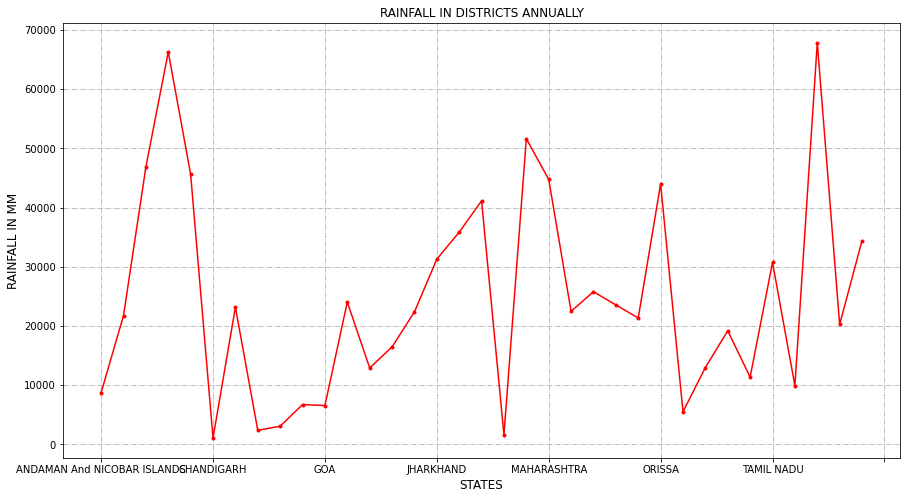

In [18]:
plt.figure(figsize=(15,8))
data.groupby("STATE_UT_NAME").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")
plt.xlabel("STATES",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("RAINFALL IN DISTRICTS ANNUALLY")
plt.show()

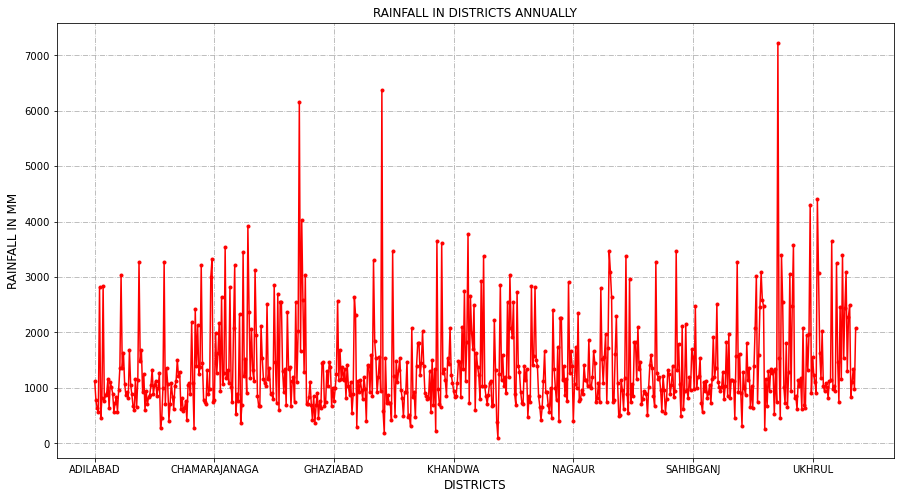

In [19]:
plt.figure(figsize=(15,8))
data.groupby("DISTRICT").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")
plt.xlabel("DISTRICTS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("RAINFALL IN DISTRICTS ANNUALLY")
plt.show()

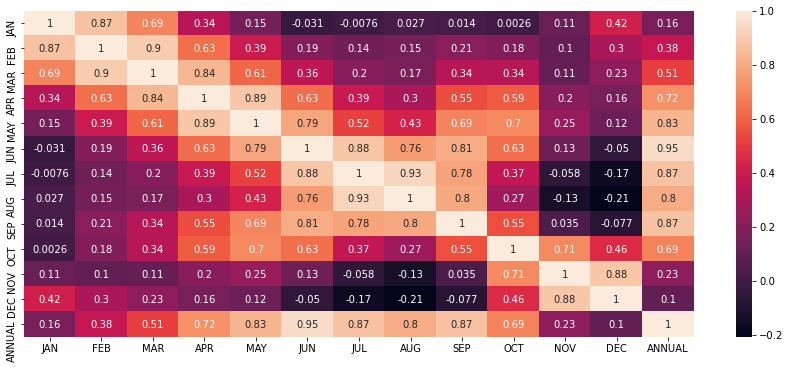

In [20]:
#Correlation between each numeric attribute
plt.figure(figsize=(15,6))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [21]:
# STATES receiving maximum and minimum rainfall
print("Top 10")
print(data.groupby('STATE_UT_NAME').mean()['ANNUAL'].sort_values(ascending=False).head(10))
print('\n')
print("--------------------------------------------")
print("Tail 10")
print(data.groupby('STATE_UT_NAME').mean()['ANNUAL'].sort_values(ascending=False).tail(10))

Top 10
STATE_UT_NAME
MEGHALAYA                      3682.842857
GOA                            3278.500000
KERALA                         2937.392857
ARUNACHAL PRADESH              2927.375000
ANDAMAN And NICOBAR ISLANDS    2911.400000
SIKKIM                         2838.350000
MIZORAM                        2616.322222
MANIPUR                        2496.633333
TRIPURA                        2479.125000
ASSAM                          2454.359259
Name: ANNUAL, dtype: float64


--------------------------------------------
Tail 10
STATE_UT_NAME
MADHYA PRADESH       1032.310000
JAMMU AND KASHMIR    1016.618182
TAMIL NADU            960.006250
UTTAR PRADESH         955.445070
ANDHRA PRADESH        945.073913
GUJARAT               924.342308
DELHI                 747.100000
PUNJAB                648.545000
HARYANA               614.557143
RAJASTHAN             581.596970
Name: ANNUAL, dtype: float64


In [22]:
# DISTRICTS receiving maximum and minimum rainfall
print("Top 10")
print(data.groupby('DISTRICT').mean()['ANNUAL'].sort_values(ascending=False).head(10))
print('\n')
print("--------------------------------------------")
print("Tail 10")
print(data.groupby('DISTRICT').mean()['ANNUAL'].sort_values(ascending=False).tail(10))

Top 10
DISTRICT
TAMENGLONG       7229.3
JAINTIA HILLS    6379.9
EAST KHASI HI    6166.1
UPPER SIANG      4402.1
UDUPI            4306.0
EAST SIANG       4034.7
DAKSHIN KANDA    3915.8
KOKRAJHAR        3772.2
KARIMGANJ        3650.8
W KHASI HILL     3643.0
Name: ANNUAL, dtype: float64


--------------------------------------------
Tail 10
DISTRICT
FATEHABAD        364.6
SIRSA            313.5
JODHPUR          308.1
HANUMANGARH      301.6
BIKANER          274.0
BARMER           268.6
SRI GANGANAGA    252.9
KARGIL           223.3
JAISALMER        181.2
LADAKH (LEH)      94.6
Name: ANNUAL, dtype: float64


In [23]:
#Modelling
data["STATE_UT_NAME"].nunique()
group = data.groupby('STATE_UT_NAME')['DISTRICT','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP',
'OCT','NOV','DEC']
data=group.get_group(('KERALA'))
data.head()

<ipython-input-23-be41abed401d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = data.groupby('STATE_UT_NAME')['DISTRICT','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP',


,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
626,ALAPPUZHA,17.5,27.9,45.1,134.0,298.7,593.0,533.0,343.1,276.8,332.9,187.6,51.6
627,CANNUR,2.5,2.0,7.6,57.9,235.0,852.4,1055.0,540.9,220.7,229.4,91.6,24.1
628,ERNAKULAM,13.2,18.8,31.2,112.0,300.4,696.4,670.2,401.3,297.1,299.9,145.0,44.4
629,KOTTAYAM,13.0,24.9,42.3,136.1,281.8,649.1,591.4,386.0,270.8,316.6,177.4,41.1
630,KOZHIKODE,2.3,3.9,15.1,80.9,256.6,895.8,955.2,500.9,251.2,262.1,130.1,30.0


In [24]:
df=data.melt(['DISTRICT']).reset_index()
df.head()

,index,DISTRICT,variable,value
0,0,ALAPPUZHA,JAN,17.5
1,1,CANNUR,JAN,2.5
2,2,ERNAKULAM,JAN,13.2
3,3,KOTTAYAM,JAN,13.0
4,4,KOZHIKODE,JAN,2.3


In [25]:
df= df[['DISTRICT','variable','value']].reset_index().sort_values(by=['DISTRICT','index'])
df.head(24)

,index,DISTRICT,variable,value
0,0,ALAPPUZHA,JAN,17.5
14,14,ALAPPUZHA,FEB,27.9
28,28,ALAPPUZHA,MAR,45.1
42,42,ALAPPUZHA,APR,134.0
56,56,ALAPPUZHA,MAY,298.7
70,70,ALAPPUZHA,JUN,593.0
84,84,ALAPPUZHA,JUL,533.0
98,98,ALAPPUZHA,AUG,343.1
112,112,ALAPPUZHA,SEP,276.8
126,126,ALAPPUZHA,OCT,332.9


In [26]:
df.DISTRICT.unique()
df.columns=['Index','District','Month','Avg_Rainfall']
df.head()

,Index,District,Month,Avg_Rainfall
0,0,ALAPPUZHA,JAN,17.5
14,14,ALAPPUZHA,FEB,27.9
28,28,ALAPPUZHA,MAR,45.1
42,42,ALAPPUZHA,APR,134.0
56,56,ALAPPUZHA,MAY,298.7


In [27]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9, 'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(Month_map)
df.head(12)

,Index,District,Month,Avg_Rainfall
0,0,ALAPPUZHA,1,17.5
14,14,ALAPPUZHA,2,27.9
28,28,ALAPPUZHA,3,45.1
42,42,ALAPPUZHA,4,134.0
56,56,ALAPPUZHA,5,298.7
70,70,ALAPPUZHA,6,593.0
84,84,ALAPPUZHA,7,533.0
98,98,ALAPPUZHA,8,343.1
112,112,ALAPPUZHA,9,276.8
126,126,ALAPPUZHA,10,332.9


In [28]:
# Here we map the districts in kerala from 20 to 33 (14 districts) integers

In [29]:
District_map={'ALAPPUZHA':20,'CANNUR':21,'ERNAKULAM':22,'KOTTAYAM':23,'KOZHIKODE':24,'MALAPPURAM':25,'PALAKKAD':26,'KOLLAM':27,'THRISSUR':28,'THIRUVANANTHA':29,'IDUKKI':30,'KASARGOD':31,'PATHANAMTHITTA':32,'WAYANAD':33}
df['District']=df['District'].map(District_map)
df.head(24)

,Index,District,Month,Avg_Rainfall
0,0,20,1,17.5
14,14,20,2,27.9
28,28,20,3,45.1
42,42,20,4,134.0
56,56,20,5,298.7
70,70,20,6,593.0
84,84,20,7,533.0
98,98,20,8,343.1
112,112,20,9,276.8
126,126,20,10,332.9


In [30]:
df.drop(columns="Index",inplace=True)
df.head(2)

,District,Month,Avg_Rainfall
0,20,1,17.5
14,20,2,27.9


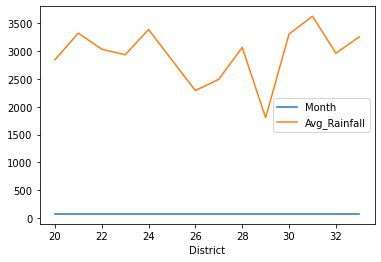

In [31]:
df.groupby("District").sum().plot()
plt.show()

In [32]:
X=np.asanyarray(df[['District','Month']]).astype('int')
y=np.asanyarray(df['Avg_Rainfall']).astype('float')
print(X.shape)
print(y.shape)

(168, 2)
(168,)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [34]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
## predicting
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)
print(y_train_predict)
print(" ")
print("---------------------------------------------------")
print(" ")
print(y_test_predict)

[259.4373172  269.05978948 275.71577935 187.30596621 304.58319618
 334.17363807 262.76531214 171.38901659 284.9767391  285.33825163
 320.86165833 184.70099633 216.8964081  171.02750406 266.09330707
 298.28871884 233.17487025 233.53638278 183.97797128 321.22317086
 236.14135266 196.92843849 308.27270365 314.56718099 272.74929695
 197.65146355 256.4708348  353.78009516 327.87916073 181.01148887
 327.5176482  279.04377429 272.02627189 194.32346861 207.27393582
 151.42104698 240.19237265 301.97822631 177.68349393 245.76382493
 354.14160769 197.28995102 318.25668846 330.84564314 317.5336634
 357.10809009 217.25792063 213.56841317 294.96072391 337.50163301
 213.20690064 229.48536279 311.60069858 265.73179455 164.73302672
 161.40503179 190.99547368 223.55239797 206.91242329 262.04228708
 344.15762288 232.81335772 289.02775909 253.14283986 350.45210022
 288.30473404 350.81361275 337.86314554 370.42006984 256.10932227
 190.63396115 219.86289051 327.15613568 188.02899127 324.18965327
 330.484130

In [35]:
print("-------Test Data ------- ")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data ------- 
MAE: 184.67257922986815
MSE: 51916.00651240563
RMSE: 227.85084268530943

-------Train Data--------
MAE: 192.08061033900566
MSE: 66586.55645267476
RMSE: 258.04371035286783


In [36]:
print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy -------")
print(round(LR.score(X_test,y_test),3)*100)


-----Training Accuracy-------
4.5
-----Testing Accuracy -------
0.8


In [37]:
#Lasso Model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [38]:
# create a lasso object
lasso = Lasso(max_iter=100000)

In [39]:
# check for best alpha value using GridSearch
parameter={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,1e1,1e2,1e3,1e4,1e5,1e6,1e7]}
lasso_regressor=GridSearchCV(
lasso,parameter,
scoring='neg_mean_squared_error',cv=5)

In [40]:
lasso_regressor.fit(X_train,y_train)
print("Best Parameter for Lasso:",lasso_regressor.best_estimator_)

C:\Users\capta\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2653665.880320302, tolerance: 681.389496795699
  model = cd_fast.enet_coordinate_descent(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3105935.570748394, tolerance: 682.6731038924731
  model = cd_fast.enet_coordinate_descent(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1823284.2732549058, tolerance: 622.2498838297872
  model = cd_fast.enet_coordinate_descent(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

Best Parameter for Lasso: Lasso(alpha=10.0, max_iter=100000)


In [59]:
lasso=Lasso(alpha=10.0,max_iter=100000)
# fit into the object
lasso.fit(X_train,y_train)

Lasso(alpha=10.0, max_iter=100000)

In [60]:
# predicting
y_train_predict=lasso.predict(X_train)
y_test_predict=lasso.predict(X_test)
print(y_train_predict)
print(" ")
print("---------------------------------------------------")
print(" ")
print(y_test_predict)

[258.35713112 268.24682834 273.73894438 192.98928518 303.40803603
 329.77408138 261.10318914 175.95594877 285.28016475 283.6286416
 318.78984929 186.94018086 219.35533053 177.60747192 263.84924716
 296.26439683 234.73714379 233.08562064 190.24322716 317.13832614
 239.13472496 202.8789824  304.5025709  311.6462101  269.34136321
 199.5759361  253.95954995 347.90195266 322.63044218 185.84564599
 324.28196533 276.4850024  272.64440951 196.82987808 209.46563331
 159.47960064 238.57773668 297.35893171 183.09958797 249.02442218
 346.25042951 201.22745925 312.74074497 327.02802336 316.04379127
 350.64801068 217.70380738 216.60927251 293.51833881 332.5201394
 218.26079566 233.64260892 307.24862892 265.50077031 170.46383273
 167.71777471 194.08382005 224.84744658 211.11715647 264.40623544
 338.01225544 236.38866694 284.72317647 251.21349192 345.15589464
 288.02622277 343.50437149 330.86861625 361.63224277 255.6110731
 195.7353432  223.7529117  325.93348848 189.68623888 321.53590731
 328.67954651

In [61]:
#lasso regression
from sklearn import metrics
print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
print("-------Test Data ------- ")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))


-------Train Data--------
MAE: 192.1217417602573
MSE: 66601.34231068658
RMSE: 258.0723586723045
-------Test Data ------- 
MAE: 184.84852521650802
MSE: 51734.51082591695
RMSE: 227.45221657727794


In [62]:
print("\n-----Training Accuracy-------")
print(round(lasso.score(X_train,y_train),3)*100)
print("-----Testing Accuracy -------")
print(round(lasso.score(X_test,y_test),3)*100)


-----Training Accuracy-------
4.5
-----Testing Accuracy -------
1.2


In [45]:
#Ridge Model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [46]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [47]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
print("Best Parameter for Ridge:",ridge_regressor.best_estimator_)

{'alpha': 100}
-69449.81274879692
Best Parameter for Ridge: Ridge(alpha=100)


In [48]:
ridge=Ridge(alpha=100.0)
# fit into the object
ridge.fit(X_train,y_train)

Ridge(alpha=100.0)

In [49]:
# predicting
y_train_predict=ridge.predict(X_train)
y_test_predict=ridge.predict(X_test)
print(y_train_predict)
print(" ")
print("---------------------------------------------------")
print(" ")
print(y_test_predict)

[259.59828919 268.37014237 274.71564463 192.03696493 301.03120417
 328.83956414 262.77104032 177.66600971 282.74109759 283.48749781
 316.14855961 190.35701424 219.84532491 176.91960949 265.94379145
 295.43210212 234.96268035 235.70908057 188.8642138  316.89495983
 237.38903126 200.80881811 304.95035552 310.54945756 272.28929372
 202.30161855 257.17193828 347.12967072 323.24046209 186.43786289
 322.49406187 277.88839577 270.79649328 199.12886742 211.07347173
 158.62950291 242.05458283 299.35125347 183.26511175 246.16088444
 347.87607094 201.55521833 314.46860892 325.66681301 312.97580848
 350.30242185 220.59172513 216.67257377 292.25935099 332.01231527
 215.92617355 231.043529   308.12310665 265.19739123 171.32050744
 168.14775631 195.95611628 226.19082717 210.32707151 261.27823988
 338.35781754 234.21628013 287.40664916 253.99918714 343.95691958
 285.91384872 344.7033198  332.75871549 362.99342638 256.42553806
 195.20971606 222.27167582 321.74766165 193.52976537 319.32131074
 324.92041

In [50]:
from sklearn import metrics
print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))


-------Train Data--------
MAE: 192.32198600864226
MSE: 66601.9798823517
RMSE: 258.0735939269101


In [51]:
print("-------Test Data ------- ")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

-------Test Data ------- 
MAE: 185.19321627598592
MSE: 51871.69295897291
RMSE: 227.75357946467693


In [52]:
print("\n-----Training Accuracy-------")
print(round(ridge.score(X_train,y_train),3)*100)
print("-----Testing Accuracy -------")
print(round(ridge.score(X_test,y_test),3)*100)


-----Training Accuracy-------
4.5
-----Testing Accuracy -------
0.8999999999999999


In [53]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)
#print(y_train_predict)
#print(" ")
#print("---------------------------------------------------")
#print(" ")
#print(y_test_predict)

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("-------Test Data ------- ")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("-----------Training Accuracy ----------- ")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy ----------- ")
print(round(random_forest_model.score(X_test,y_test),3)*100)


-------Train Data--------
MAE: 87.823841406823
MSE: 18274.301492525417
RMSE: 135.18247479804998
-------Test Data ------- 
MAE: 103.5729967441149
MSE: 19245.233134783524
RMSE: 138.727189601691
-----------Training Accuracy ----------- 
73.8
-----------Testing Accuracy ----------- 
63.2


In [54]:
predicted = random_forest_model.predict([[21,10]])
print(predicted)

[303.84131342]
